# Time Series Analysis For Bitcoin Price Prediction using Prophet

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Data Collection

In [3]:
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864,468.174,452.422,457.334,457.334,21056800
2014-09-18,456.860,456.860,413.104,424.440,424.440,34483200
2014-09-19,424.103,427.835,384.532,394.796,394.796,37919700
2014-09-20,394.673,423.296,389.883,408.904,408.904,36863600
2014-09-21,408.085,412.426,393.181,398.821,398.821,26580100
...,...,...,...,...,...,...
2023-06-26,30480.523,30636.029,29955.744,30271.131,30271.131,16493186997
2023-06-27,30274.320,31006.787,30236.650,30688.164,30688.164,16428827944
2023-06-28,30696.561,30703.279,29921.822,30086.246,30086.246,14571500779


In [5]:
df.reset_index(inplace=True)

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864,468.174,452.422,457.334,457.334,21056800
1,2014-09-18,456.860,456.860,413.104,424.440,424.440,34483200
2,2014-09-19,424.103,427.835,384.532,394.796,394.796,37919700
3,2014-09-20,394.673,423.296,389.883,408.904,408.904,36863600
4,2014-09-21,408.085,412.426,393.181,398.821,398.821,26580100
...,...,...,...,...,...,...,...
3204,2023-06-26,30480.523,30636.029,29955.744,30271.131,30271.131,16493186997
3205,2023-06-27,30274.320,31006.787,30236.650,30688.164,30688.164,16428827944
3206,2023-06-28,30696.561,30703.279,29921.822,30086.246,30086.246,14571500779
3207,2023-06-29,30086.188,30796.250,30057.203,30445.352,30445.352,13180860821


## Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3209 non-null   datetime64[ns]
 1   Open       3209 non-null   float64       
 2   High       3209 non-null   float64       
 3   Low        3209 non-null   float64       
 4   Close      3209 non-null   float64       
 5   Adj Close  3209 non-null   float64       
 6   Volume     3209 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 175.6 KB


In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3209.000,3209.000,3209.000,3209.000,3209.000,3209.000
mean,13565.300,13898.148,13201.398,13573.409,13573.409,16583201749.236
std,16012.977,16415.396,15553.811,16010.998,16010.998,19543000478.026
min,176.897,211.731,171.510,178.103,178.103,5914570.000
25%,751.833,764.084,738.924,751.616,751.616,126656000.000
50%,7625.970,7776.420,7460.756,7624.910,7624.910,10014858959.000
75%,20092.236,20382.096,19636.816,20104.023,20104.023,27525063551.000
max,67549.734,68789.625,66382.062,67566.828,67566.828,350967941479.000


In [11]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864,468.174,452.422,457.334,457.334,21056800
1,2014-09-18,456.860,456.860,413.104,424.440,424.440,34483200
2,2014-09-19,424.103,427.835,384.532,394.796,394.796,37919700
3,2014-09-20,394.673,423.296,389.883,408.904,408.904,36863600
4,2014-09-21,408.085,412.426,393.181,398.821,398.821,26580100


In [12]:
df = df[['Date','Adj Close']]
df

,Date,Adj Close
0,2014-09-17,457.334
1,2014-09-18,424.440
2,2014-09-19,394.796
3,2014-09-20,408.904
4,2014-09-21,398.821
...,...,...
3204,2023-06-26,30271.131
3205,2023-06-27,30688.164
3206,2023-06-28,30086.246
3207,2023-06-29,30445.352


## change columns to ds and y

In [13]:
df.columns = ['ds','y']

In [14]:
df

,ds,y
0,2014-09-17,457.334
1,2014-09-18,424.440
2,2014-09-19,394.796
3,2014-09-20,408.904
4,2014-09-21,398.821
...,...,...
3204,2023-06-26,30271.131
3205,2023-06-27,30688.164
3206,2023-06-28,30086.246
3207,2023-06-29,30445.352


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3209 non-null   datetime64[ns]
 1   y       3209 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 50.3 KB


## Model Building and Training

In [16]:
model = Prophet(daily_seasonality=True)

In [17]:
model.fit(df)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [18]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [19]:
df.tail()

,ds,y
3204,2023-06-26,30271.131
3205,2023-06-27,30688.164
3206,2023-06-28,30086.246
3207,2023-06-29,30445.352
3208,2023-06-30,30845.139


## Creating Future 3 years Dataframe

In [20]:
future_dates = model.make_future_dataframe(periods=1095,freq='D')

In [21]:
future_dates.tail()

,ds
4299,2026-06-25
4300,2026-06-26
4301,2026-06-27
4302,2026-06-28
4303,2026-06-29


In [22]:
prediction = model.predict(future_dates)

In [23]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4299,2026-06-25,-40572.496,-100442.388,9354.583,-98589.311,11186.016,-1546.188,-1546.188,-1546.188,-330.742,...,-10.965,-10.965,-10.965,-1204.481,-1204.481,-1204.481,0.000,0.000,0.000,-42118.684
4300,2026-06-26,-40623.468,-99466.628,9600.760,-98712.553,11234.277,-1659.312,-1659.312,-1659.312,-330.742,...,9.149,9.149,9.149,-1337.719,-1337.719,-1337.719,0.000,0.000,0.000,-42282.781
4301,2026-06-27,-40674.441,-99341.349,11087.484,-98835.795,11282.538,-1817.481,-1817.481,-1817.481,-330.742,...,-11.920,-11.920,-11.920,-1474.819,-1474.819,-1474.819,0.000,0.000,0.000,-42491.923
4302,2026-06-28,-40725.414,-100898.894,8889.650,-98959.037,11330.799,-1957.111,-1957.111,-1957.111,-330.742,...,-12.108,-12.108,-12.108,-1614.261,-1614.261,-1614.261,0.000,0.000,0.000,-42682.525
4303,2026-06-29,-40776.387,-103239.145,9379.506,-99082.279,11379.060,-2086.600,-2086.600,-2086.600,-330.742,...,-1.387,-1.387,-1.387,-1754.471,-1754.471,-1754.471,0.000,0.000,0.000,-42862.986


In [24]:
prediction[['ds','yhat']].tail()

,ds,yhat
4299,2026-06-25,-42118.684
4300,2026-06-26,-42282.781
4301,2026-06-27,-42491.923
4302,2026-06-28,-42682.525
4303,2026-06-29,-42862.986


In [25]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4304 entries, 0 to 4303
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          4304 non-null   datetime64[ns]
 1   trend                       4304 non-null   float64       
 2   yhat_lower                  4304 non-null   float64       
 3   yhat_upper                  4304 non-null   float64       
 4   trend_lower                 4304 non-null   float64       
 5   trend_upper                 4304 non-null   float64       
 6   additive_terms              4304 non-null   float64       
 7   additive_terms_lower        4304 non-null   float64       
 8   additive_terms_upper        4304 non-null   float64       
 9   daily                       4304 non-null   float64       
 10  daily_lower                 4304 non-null   float64       
 11  daily_upper                 4304 non-null   float64     

## Visualizations

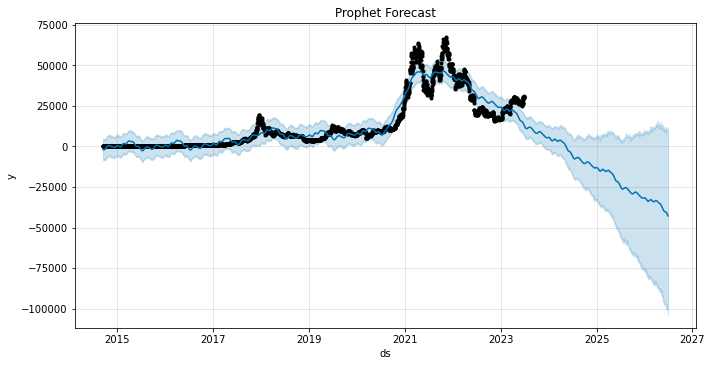

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(prediction, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

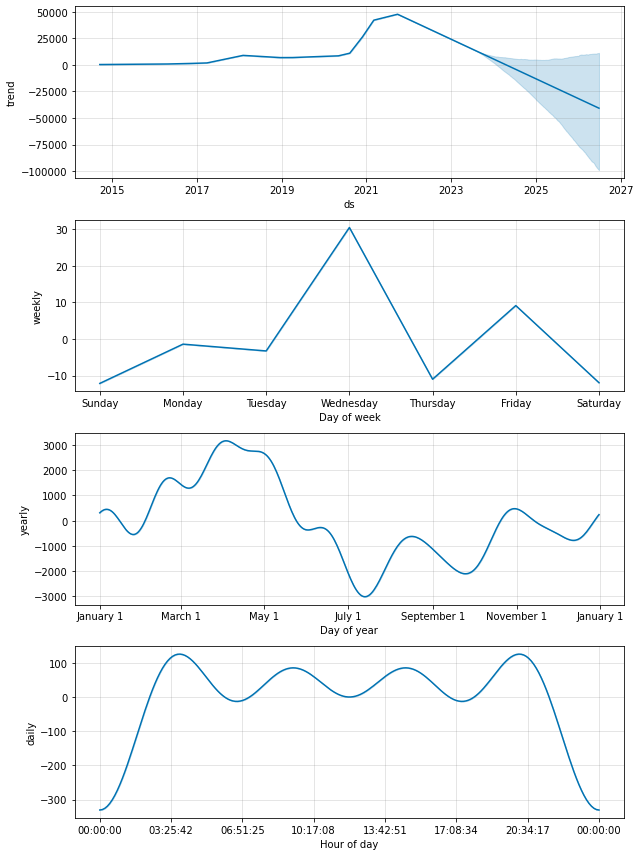

In [27]:
fig2 = model.plot_components(prediction)
plt.show()

## Predictions

In [28]:
print('The Price of Bitcoin is:')
print(prediction[prediction.ds == '2022-01-01']['yhat'])

The Price of Bitcoin is:
2663   42776.493
Name: yhat, dtype: float64


In [29]:
val1 = prediction.loc[prediction['ds'] == '2023-01-01', 'yhat'].values[0]
print('The Price of Bitcoin on 2023-01-01 is:',val1,'$')

The Price of Bitcoin on 2023-01-01 is: 24157.128996511812 $


In [30]:
val2 = prediction.loc[prediction['ds'] == '2024-01-01', 'yhat'].values[0]
print('The Price of Bitcoin on 2024-01-01 is:',val2,'$')

The Price of Bitcoin on 2024-01-01 is: 5548.172674406073 $


## Saving the Model

In [31]:
import pickle
pickle.dump(model,open('prophet.pkl','wb'))